In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving house_cleaned_data.csv to house_cleaned_data (1).csv


In [ ]:
import io
cluster_df_org = pd.read_csv(io.StringIO(uploaded['house_cleaned_data.csv'].decode('utf-8')))
cluster_df = cluster_df_org.drop(['address','area','image','listing_type','broker_name','input','property_url','listing_url'], axis=1)
cluster_df

,rank,property_id,latitude,longitude,price,bathrooms,bedrooms,zestimate,rent_zestimate,days_on_zillow
0,205,70983496,29.599431,-98.254866,296000.0,3.0,3.0,270100.0,2024.0,0.0
1,66,97629907,29.557442,-95.751786,425000.0,3.0,2.0,436000.0,2967.0,0.0
2,790,28157774,29.974863,-95.580004,325000.0,3.0,5.0,305600.0,2578.0,0.0
3,175,52871041,30.101684,-93.749762,262000.0,4.0,5.0,189400.0,2125.0,0.0
4,479,53580872,29.809318,-95.983255,529999.0,3.0,4.0,446900.0,2566.0,0.0
...,...,...,...,...,...,...,...,...,...,...
308,156,27797191,29.788861,-95.485608,1375000.0,3.0,5.0,1376300.0,8355.0,0.0
309,462,50315804,30.659956,-96.341943,399900.0,4.0,5.0,380400.0,3195.0,0.0
310,678,28824579,27.759494,-97.396044,174999.0,1.0,2.0,154100.0,1300.0,0.0
311,516,28068451,29.738645,-95.549303,459000.0,2.0,4.0,507100.0,2900.0,0.0


In [ ]:
# K means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Fit K-Means
kmeans_1 = KMeans(n_clusters=4,random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(cluster_df)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(cluster_df, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(cluster_df, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(cluster_df, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.7273
Calinski Harabasz Score: 40857.8939
Davies Bouldin Score: 0.3171


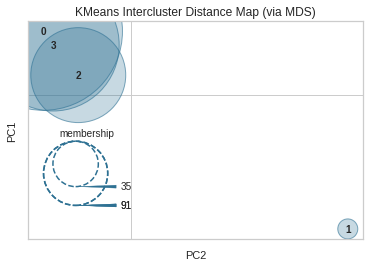

In [ ]:
# Inter cluster distance map
from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans_1)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

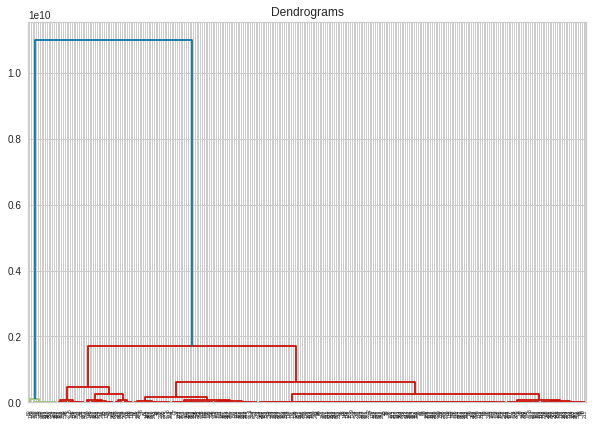

In [ ]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cluster_df, method='ward'))

In [ ]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define the model
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat = model.fit(cluster_df)
yhat_2 = model.fit_predict(cluster_df)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(cluster_df, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(cluster_df, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(cluster_df, yhat_2)
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.6918
Calinski Harabasz Score: 31628.9104
Davies Bouldin Score: 0.3134


3931575.1167333554


<Figure size 360x360 with 0 Axes>

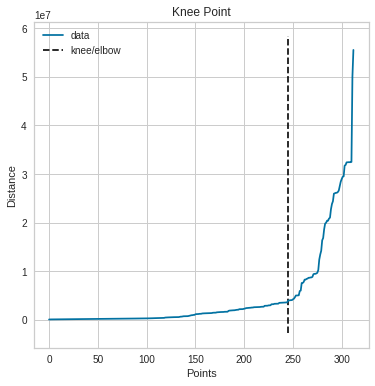

In [ ]:
# parameter tuning for eps
!pip install --upgrade kneed
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(cluster_df)
distances, indices = neighbors.kneighbors(cluster_df)
distances = np.sort(distances[:,10], axis=0)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

In [ ]:
# dbscan clustering
#data = cluster_df.drop(['latitude','longitude','rent_zestimate','days_on_zillow','zestimate','bedrooms','bathrooms'], axis=1)
!pip install --upgrade pycaret
from pycaret.datasets import get_data
dataset = get_data('mice')
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

     |████████████████████████████████| 14.8 MB 6.4 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.

Data for Modeling: (1026, 82)
Unseen Data For Predictions: (54, 82)


In [ ]:
!pip install --upgrade numpy
from pycaret.clustering import *

exp_clu101 = setup(data, normalize = True, 
                   ignore_features = ['MouseID'],
                   session_id = 123, use_gpu = True)

,Description,Value
0,session_id,123
1,Original Data,"(1026, 82)"
2,Missing Values,True
3,Numeric Features,77
4,Categorical Features,4
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1026, 91)"
9,CPU Jobs,-1


In [ ]:
#Run pycaret
jewellery = get_data('jewellery')
cluster = setup(data = jewellery, use_gpu = True)

,Description,Value
0,session_id,6226
1,Original Data,"(505, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(505, 4)"
9,CPU Jobs,-1


In [ ]:
# gaussian mixture clustering
import pandas as pd
from google.colab import files
uploaded_gmm = files.upload()

Saving e-shop clothing 2008.csv to e-shop clothing 2008 (3).csv


In [ ]:
data_gmm = pd.read_csv(io.StringIO(uploaded_gmm['e-shop clothing 2008.csv'].decode('utf-8')))
#cluster_df = cluster_df_org.drop(['address','area','image','listing_type','broker_name','input','property_url','listing_url'], axis=1)
data_gmm

,year;month;day;order;country;session ID;page 1 (main category);page 2 (clothing model);colour;location;model photography;price;price 2;page
0,2008;4;1;1;29;1;1;A13;1;5;1;28;2;1
1,2008;4;1;2;29;1;1;A16;1;6;1;33;2;1
2,2008;4;1;3;29;1;2;B4;10;2;1;52;1;1
3,2008;4;1;4;29;1;2;B17;6;6;2;38;2;1
4,2008;4;1;5;29;1;2;B8;4;3;2;52;1;1
...,...
165469,2008;8;13;1;29;24024;2;B10;2;4;1;67;1;1
165470,2008;8;13;1;9;24025;1;A11;3;4;1;62;1;1
165471,2008;8;13;1;34;24026;1;A2;3;1;1;43;2;1
165472,2008;8;13;2;34;24026;3;C2;12;1;1;43;1;1


In [ ]:
#GMM
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

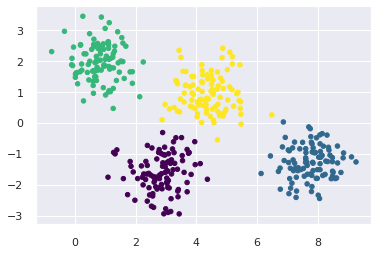

In [ ]:
from sklearn.mixture import GaussianMixture as gmm
gmm_model = GaussianMixture(n_components=4).fit(X)
labels = gmm_model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis');